<a href="https://colab.research.google.com/github/munisa033/PraktikumMachingLearning/blob/main/Prediksi_Risiko_Penyakit_Jantung_Menggunakan_Algoritma_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving heart disease dataset.xlsx to heart disease dataset.xlsx


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


In [8]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Baca file otomatis tanpa harus tulis nama manual
file_name = list(uploaded.keys())[0]
print("✅ File yang dibaca:", file_name)

# Baca dataset
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# Tampilkan data
print("📋 5 Data Teratas:")
print(df.head())
print("\nJumlah Baris & Kolom:", df.shape)
print("\nCek Missing Value:\n", df.isnull().sum())


Saving heart disease dataset.xlsx to heart disease dataset (3).xlsx
✅ File yang dibaca: heart disease dataset (3).xlsx
📋 5 Data Teratas:
   id  age     sex    dataset               cp  trestbps   chol  fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0  1.0   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  0.0   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  0.0   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  0.0   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  0.0   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0    0.0     23.0  downsloping  0.0   
1  lv hypertrophy   108.0    1.0     15.0         flat  3.0   
2  lv hypertrophy   129.0    1.0     26.0         flat  2.0   
3          normal   187.0    0.0     35.0  downsloping  0.0   
4  lv hypertrophy   172.0    0.0     14.0    upsloping  0.0   

                thal  num  
0       fixed defect   

In [9]:
# Hapus kolom yang tidak diperlukan
df = df.drop(columns=['id', 'dataset'])

# Encode kolom kategorikal
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    df[col] = label.fit_transform(df[col])

# Cek hasil encoding
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,23.0,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,15.0,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,26.0,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,35.0,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,14.0,2,0.0,1,0


/tmp/ipython-input-2406622374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='Blues')


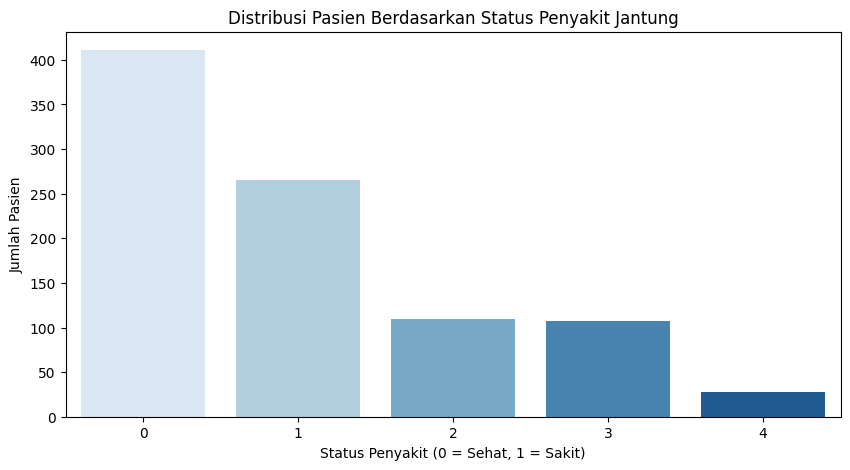

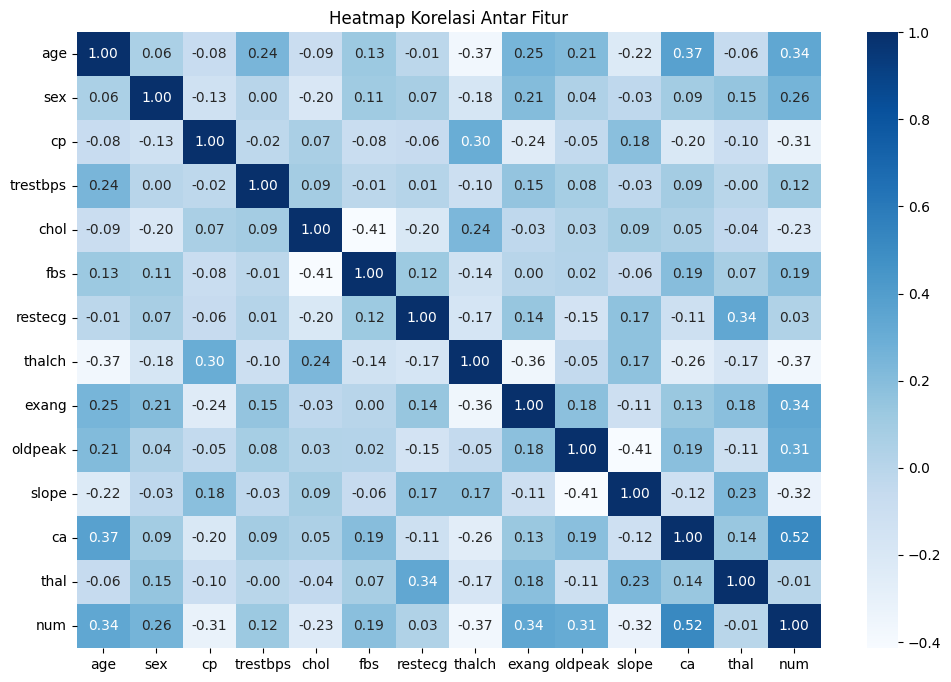

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi pasien berdasarkan status penyakit
plt.figure(figsize=(10,5))
sns.countplot(x='num', data=df, palette='Blues')
plt.title('Distribusi Pasien Berdasarkan Status Penyakit Jantung')
plt.xlabel('Status Penyakit (0 = Sehat, 1 = Sakit)')
plt.ylabel('Jumlah Pasien')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df.drop('num', axis=1)
y = df['num']

# Bagi data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Cek total missing per kolom
print(df.isnull().sum())

# Tampilkan baris yang ada NaN (5 baris pertama)
display(df[df.isnull().any(axis=1)].head())


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
166,52,1,2,138.0,223.0,0,1,169.0,0,0.0,2,NaN,1,0
192,43,1,0,132.0,247.0,1,0,143.0,1,1.0,1,NaN,2,1
287,58,1,1,125.0,220.0,0,1,144.0,0,4.0,1,NaN,2,0
302,38,1,2,138.0,175.0,0,1,173.0,0,0.0,2,NaN,1,0
303,28,1,1,130.0,132.0,0,0,185.0,0,0.0,3,NaN,3,0


In [15]:
# Pastikan semua kolom fitur numeric (setelah encoding)
print(df.dtypes)

# Cek infinite values
import numpy as np
if np.isinf(df.values).any():
    print("Ada nilai infinite. Mengganti dengan NaN dulu.")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Jika muncul infinite, ulangi Cell B untuk impute
print("Missing final:", df.isnull().sum().sum())


age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object
Missing final: 817


/tmp/ipython-input-1958846799.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)


✅ Semua NaN sudah dibersihkan: 0
NaN di X_train: 0
NaN di X_test: 0
🎯 Akurasi: 77.17 %

               precision    recall  f1-score   support

           0       0.69      0.81      0.74        75
           1       0.85      0.74      0.79       109

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



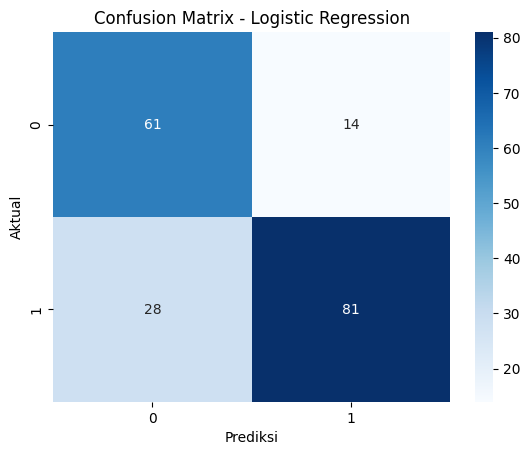

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===== Bersihkan NaN FINAL sebelum split =====
# Ganti semua NaN dengan median (numerik) atau mode (kategorikal)
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# Pastikan target 'num' tidak diimpute
if 'num' in num_cols:
    num_cols.remove('num')

for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)

for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# Drop baris yang masih ada NaN sisa (kalau ada banget)
df = df.dropna()
print("✅ Semua NaN sudah dibersihkan:", df.isnull().sum().sum())

# ===== Pisahkan fitur & target =====
X = df.drop('num', axis=1)
y = df['num']

# Kalau kolom num punya nilai >1 (misal 0–4), ubah jadi biner:
y = (y > 0).astype(int)

# ===== Split data =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== Standarisasi =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== Cek NaN lagi buat pastiin bersih =====
print("NaN di X_train:", np.isnan(X_train).sum())
print("NaN di X_test:", np.isnan(X_test).sum())

# ===== Training Logistic Regression =====
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ===== Evaluasi =====
print("🎯 Akurasi:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression

# Pastikan X_train, X_test, y_train, y_test sudah dari Cell D
# Model Logistic Regression final
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

print("✅ Model berhasil dilatih tanpa error.")


✅ Model berhasil dilatih tanpa error.



🎯 Akurasi Model: 77.17 %

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.69      0.81      0.74        75
           1       0.85      0.74      0.79       109

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



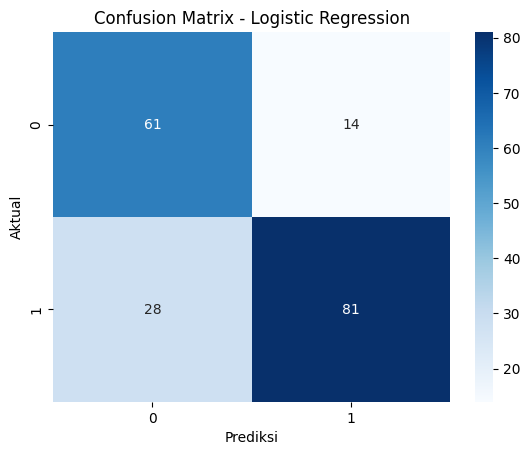

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n🎯 Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


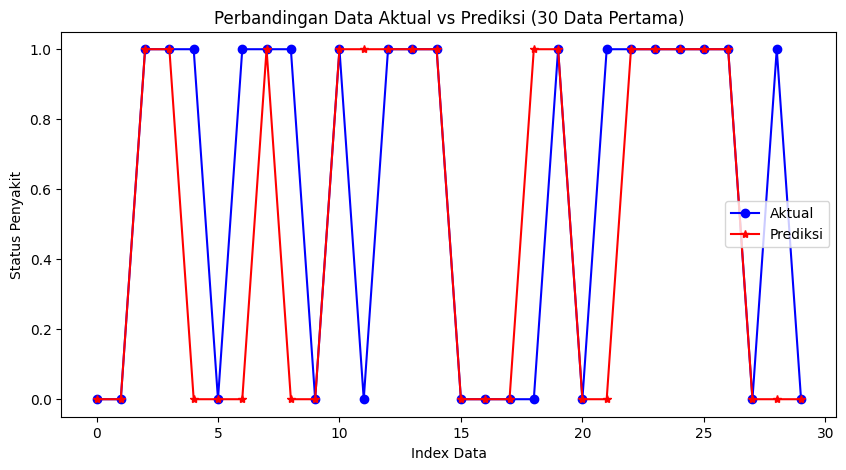

In [20]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:30], 'bo-', label='Aktual')
plt.plot(y_pred[:30], 'r*-', label='Prediksi')
plt.title('Perbandingan Data Aktual vs Prediksi (30 Data Pertama)')
plt.xlabel('Index Data')
plt.ylabel('Status Penyakit')
plt.legend()
plt.show()
